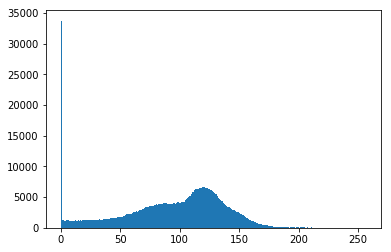

In [85]:
import matplotlib.pyplot as plt
import cv2
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)


import numpy as np
import skimage.morphology
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('cropped_Wild023.tif',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

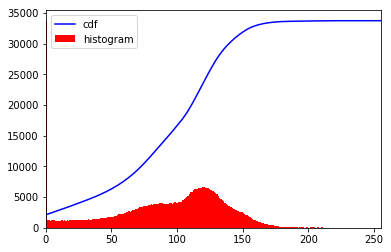

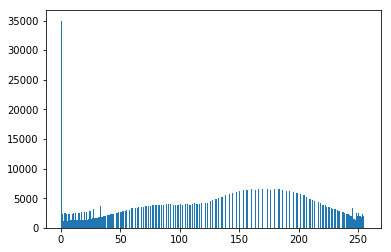

(array([3.4969e+04, 2.3860e+03, 1.1980e+03, 2.4890e+03, 2.3450e+03,
       1.1730e+03, 2.3460e+03, 2.3740e+03, 1.2430e+03, 2.4020e+03,
       2.4230e+03, 1.2500e+03, 2.4950e+03, 1.2330e+03, 2.4730e+03,
       2.4960e+03, 1.2430e+03, 2.6290e+03, 1.3340e+03, 2.6900e+03,
       1.3480e+03, 2.6520e+03, 1.3600e+03, 1.4690e+03, 2.8440e+03,
       1.4500e+03, 1.6180e+03, 3.1290e+03, 1.6580e+03, 1.6610e+03,
       1.6180e+03, 1.7400e+03, 1.7780e+03, 3.6350e+03, 1.8340e+03,
       1.9640e+03, 1.9160e+03, 2.0460e+03, 0.0000e+00, 2.1970e+03,
       2.1860e+03, 2.2480e+03, 2.3280e+03, 2.3220e+03, 2.4040e+03,
       0.0000e+00, 2.5350e+03, 2.5540e+03, 2.6770e+03, 0.0000e+00,
       2.6180e+03, 2.8010e+03, 2.9170e+03, 0.0000e+00, 2.8740e+03,
       3.0850e+03, 0.0000e+00, 3.0430e+03, 0.0000e+00, 3.2820e+03,
       3.3150e+03, 0.0000e+00, 3.3650e+03, 0.0000e+00, 3.3270e+03,
       3.5610e+03, 0.0000e+00, 3.5800e+03, 0.0000e+00, 3.5440e+03,
       0.0000e+00, 3.6190e+03, 0.0000e+00, 3.6970e+03, 0.0000

ValueError: operands could not be broadcast together with shapes (256,) (257,) 

In [103]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum() #cumulative sum
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,255])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
equalhist=plt.hist(img2.ravel(),256,[0,256])
plt.show()
print(equalhist)
np.std(equalhist)

In [87]:
equ = cv2.equalizeHist(img)
ablur = cv2.blur(equ,(24, 24))
a_mthres = cv2.adaptiveThreshold(ablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,51,4) 

In [88]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
 
#parameters = norm.fit(equalhist)
#x = np.linspace(0,255)

#fitted_pdf = norm.pdf(x,loc = parameters[0],scale = parameters[1])
#normal_pdf = norm.pdf(x)

# Type help(plot) for a ton of information on pyplot
#plt.plot(x,fitted_pdf,label="Fitted normal dist")
#plt.plot(x,normal_pdf,label="Normal dist")
#plt.hist(equ,normed=1,label="img2")
#plt.title("Normal distribution fitting")

#plt.legend()
#plt.show()

In [117]:
from numpy import sqrt, pi, exp, linspace, loadtxt

from lmfit import  Model

import matplotlib.pyplot as plt

data = equalhist
x = data[:, 0]
y = data[:, 1]

def gaussian(x, amp, cen, wid):
    "1-d gaussian: gaussian(x, amp, cen, wid)"
    return (amp/(sqrt(2*pi)*wid)) * exp(-(x-cen)**2 /(2*wid**2))

gmod = Model(gaussian)
result = gmod.fit(y, x=x, amp=5, cen=5, wid=1)

print(result.fit_report())

plt.plot(x, y,         'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()

ModuleNotFoundError: No module named 'lmfit'

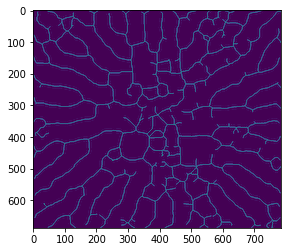

In [17]:
#ADAPTIVE SKELETON
from skimage.morphology import skeletonize
adaptiveskeleton = skeletonize(a_mthres)
#ax = plt.subplot()
#ax.imshow(adaptiveskeleton, cmap=red2, interpolation='sinc')

from skimage.morphology import remove_small_objects
cleanskel=remove_small_objects(adaptiveskeleton, min_size=70, connectivity=3)
plot = plt.subplot()
plot.imshow(cleanskel, interpolation='sinc') 

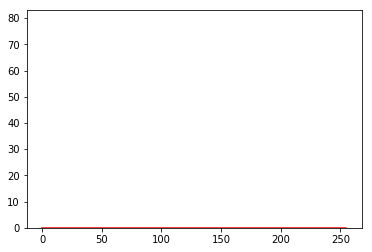

In [33]:
from scipy.stats import norm
from numpy import linspace
from pylab import plot,show,hist

def PlotHistNorm(data, log=False):
# distribution fitting

    param = norm.fit(data) 
mean = param[0]
sd = param[1]

#Set large limits
xlims = [-6*sd+mean, 6*sd+mean]

#Plot histogram
histdata = hist(data,bins=255)

#Generate X points
x = linspace(0,255,500)

#Get Y points via Normal PDF with fitted parameters
pdf_fitted = norm.pdf(x,loc=mean,scale=sd)


#Plot PDF
plot(x,pdf_fitted,'r-')

/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


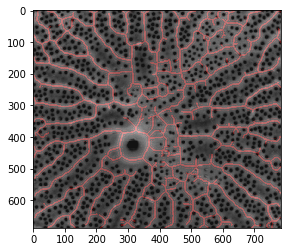

In [255]:
import matplotlib.image as mpimg
img2=mpimg.imread('cropped_Wild023.tif')
imgplot2 = plt.imshow(img2, alpha= .9)

ax2 = plt.subplot()
ax2.imshow(cleanskel, cmap=red2, interpolation='sinc', alpha=0.3) 
plt.show()